In [1]:
from imtools import *
from numpy import *
import matplotlib.pyplot as plt
from PIL import Image
import numpy.fft as fft

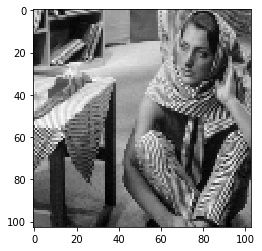

In [2]:
#Exercice n°1
def undersample1(u,K):
    image = u[::K,::K]
    return (image)

i = open_image('barbara.png')
display_image(undersample1(i,5))

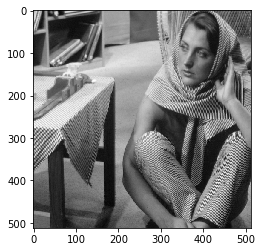

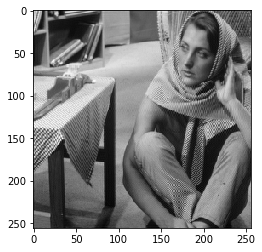

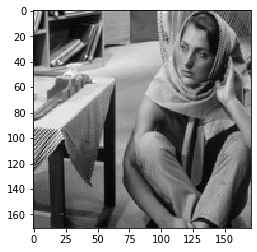

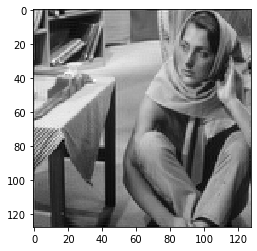

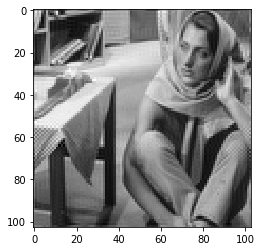

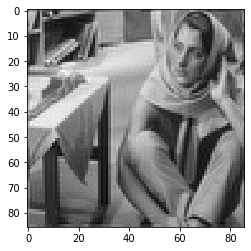

In [3]:
def undersample2(u,K):
    N = u.shape[0]
    C = fft.fft2(u)
    Cs = fft.fftshift(C)
    a = int(N/2)
    b = int(N/(2*K))
    [x,y] = meshgrid(range(-a,a),range(-a,a))
    Cs *= (x >= -b)*(x <= b)*(y <= b)*(y >= -b)
    v = fft.ifft2(fft.ifftshift(Cs))
    w = v.real
    return w[::K,::K]

i = open_image('barbara.png')
for l in range(1,7):
    display_image(undersample2(i,l))

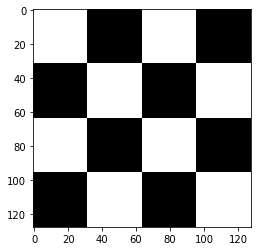

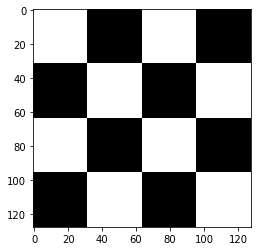

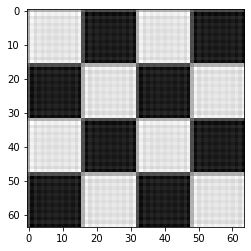

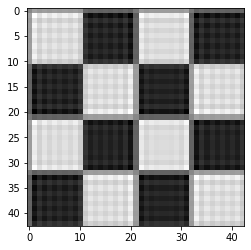

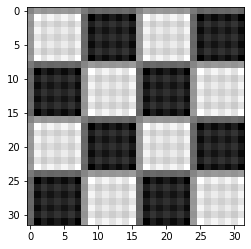

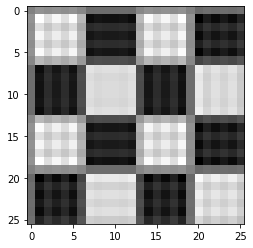

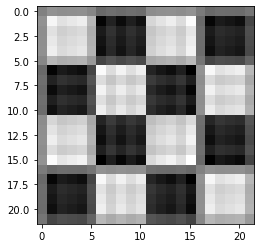

In [4]:
N = 128
U = zeros((N,N))
[x,y] = meshgrid(range(N),range(N))
U[x,y] = (-1)**((y//32)+(x//32))
display_image(U)
for l in range(1,7):
    display_image(undersample2(U,l))

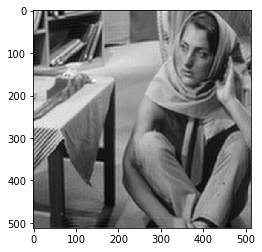

In [5]:
#Exercice n°2
def project_on_BL(u,K):
    N = u.shape[0]
    C = fft.fft2(u)
    Cs = fft.fftshift(C)
    a = int(N/2)
    b = int(N/(2*K))
    [x,y] = meshgrid(range(-a,a),range(-a,a))
    Cs *= (x >= -b)*(x <= b)*(y <= b)*(y >= -b)
    v = fft.ifft2(fft.ifftshift(Cs))
    return v.real

i = open_image('barbara.png')
display_image(project_on_BL(i,4))

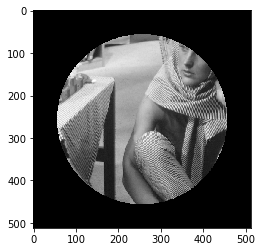

In [6]:
def project_on_SL(u,R):
    N = u.shape[0]
    a = int(N/2)
    [x,y] = meshgrid(range(-a,a),range(-a,a))
    u *= x**2 + y**2 <= R**2
    return u.real

i = open_image('barbara.png')
display_image(project_on_SL(i,200))

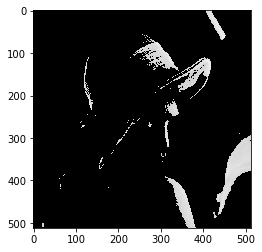

In [7]:
i = open_image('lena.png')
i[i < 200] = 0  
display_image(i)

In [8]:
def iterate_filter(h,K,R):
    h1 = project_on_SL(project_on_BL(h,K),R)
    h1[h1<0] = 0
    h1[h1>1] = 1
    h1 /= h1.sum()
    return h1

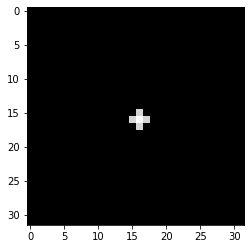

In [9]:
def approx_filter(h0,K,R):
    e = 0.00001
    h = h0
    while numpy.max(numpy.abs(h - iterate_filter(h,K,R))) >= e:
        h = iterate_filter(h,K,R)
    return iterate_filter(h,K,R)

h0 = numpy.ones((32,32))
display_image(approx_filter(h0,3,1))

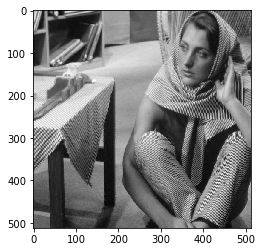

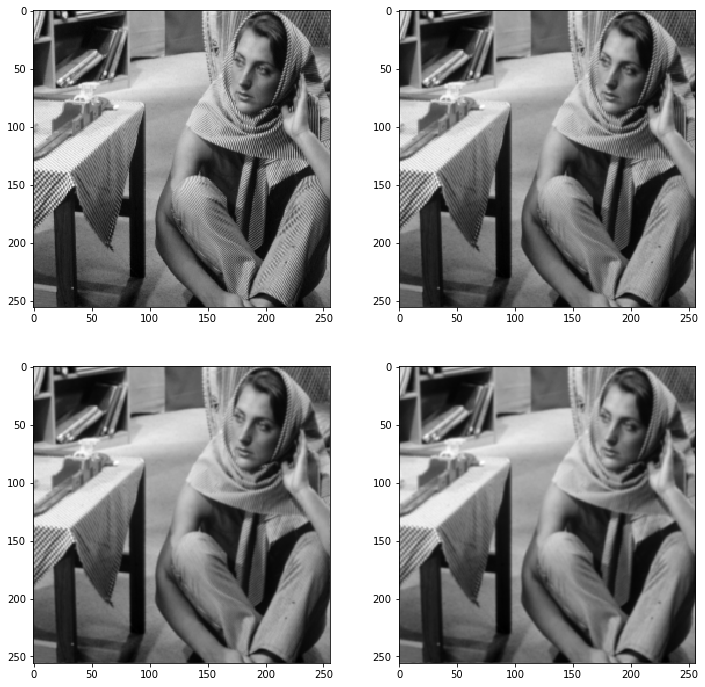

In [10]:
def undersample3(u,R,K):
    N = u.shape[0]
    h0 = numpy.ones((N,N))
    TFu = fft.fft2(u)
    TFh = fft.fft2(approx_filter(h0,K,R))
    TFuh = TFu*TFh
    TFIuh = real(fft.ifft2(TFuh))
    return fft.fftshift(TFIuh[::K,::K])

u = open_image('barbara.png')
display_image(u)
display_images_cb([undersample3(u,R,2) for R in [1,2,3,4]])

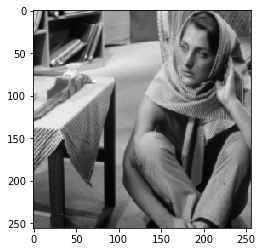

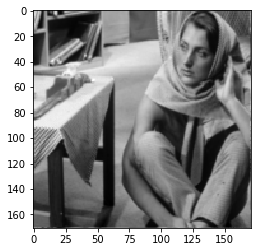

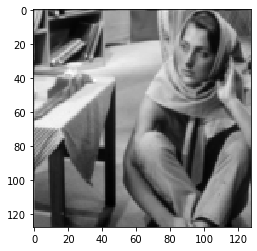

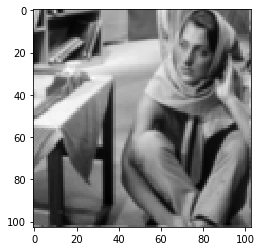

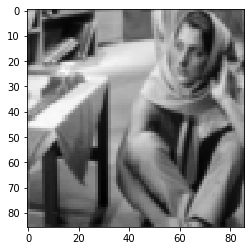

In [11]:
for i in [2,3,4,5,6]:
    display_image(undersample3(u,i,i))

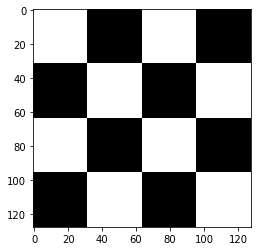

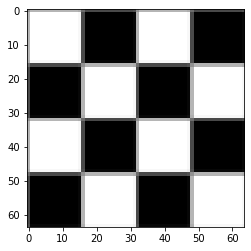

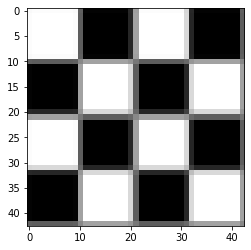

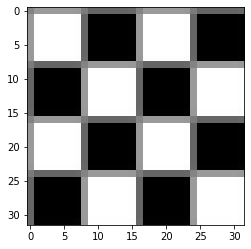

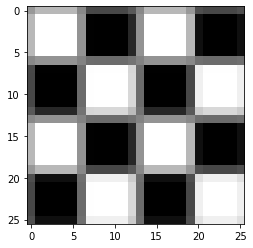

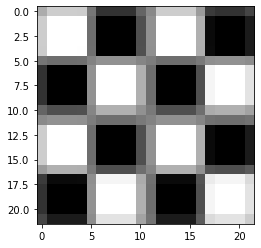

In [12]:
N = 128
U = zeros((N,N))
[x,y] = meshgrid(range(N),range(N))
U[x,y] = (-1)**((y//32)+ (x//32))
display_image(U)
for i in [2,3,4,5,6]:
    display_image(undersample3(U,i,i))

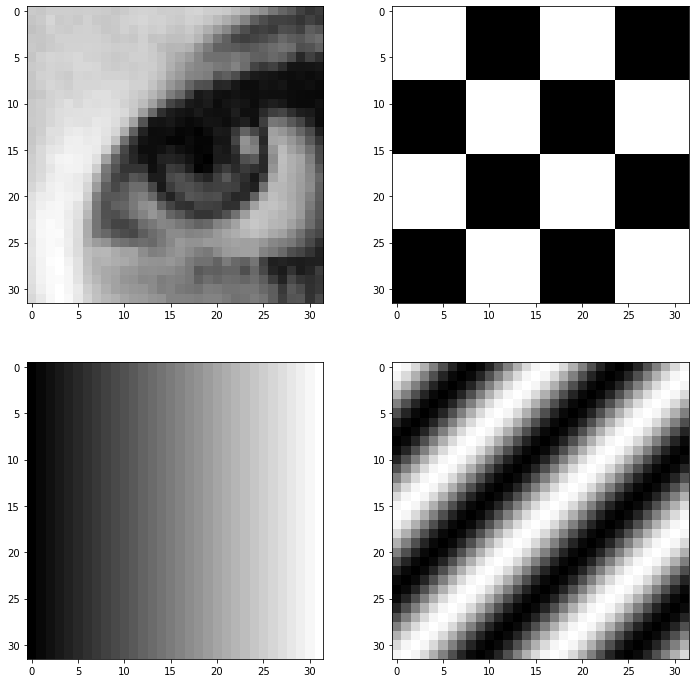

In [13]:
#Exercice n°3
#u1
u1 = open_image('lena.png')
u1 = u1[250:282,309:341]
#u2
[m,n] = meshgrid(range(32),range(32))
u2 = (-1)**((m//8)+(n//8))
#u3
u3 = m
#u4
u4 = cos(pi*(m+n)/8)

display_images_cb([u1,u2,u3,u4])

In [28]:
def oversample1(u,K):
    N = u.shape[0]
    [m,n] = meshgrid(range(N*K),range(N*K))
    return u[n//K,m//K]

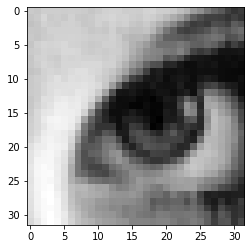

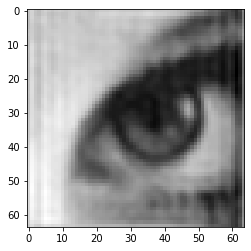

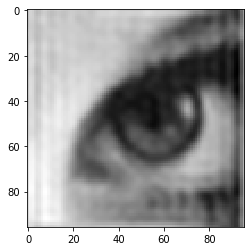

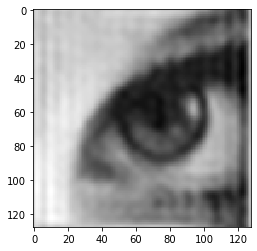

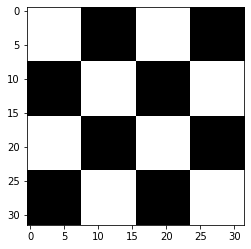

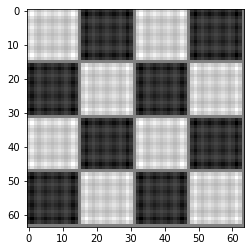

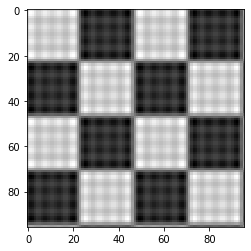

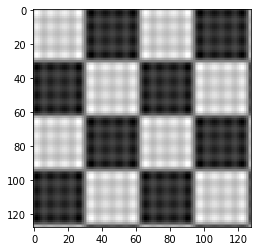

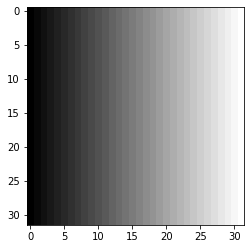

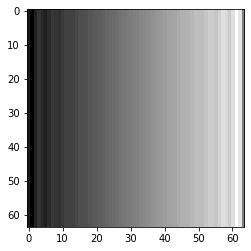

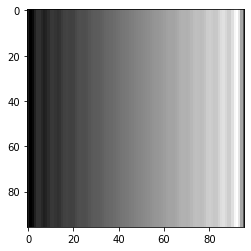

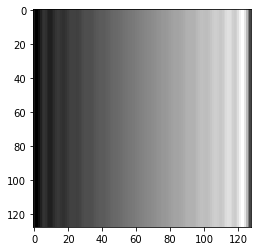

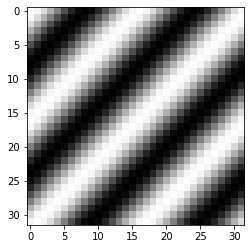

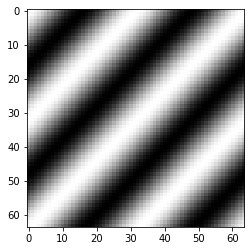

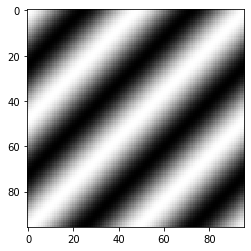

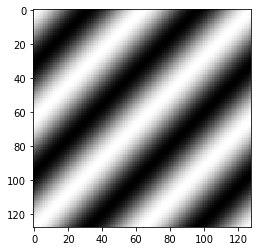

In [30]:
def oversample2(u,K):
    N = u.shape[0]
    v = zeros((K*N,K*N),complex)
    C = fft.fftshift(fft.fft2(u))
    a = N*(K-1)//2
    b = N*(K+1)//2
    v[a:b,a:b] = C
    t = fft.ifft2(fft.ifftshift(v))
    return t.real

for i in range(1,5):
    display_image(oversample2(u1,i))
for i in range(1,5):
    display_image(oversample2(u2,i))
for i in range(1,5):
    display_image(oversample2(u3,i))
for i in range(1,5):
    display_image(oversample2(u4,i))

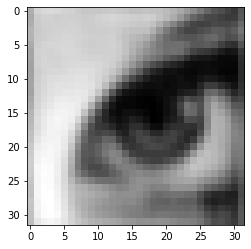

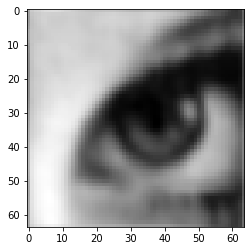

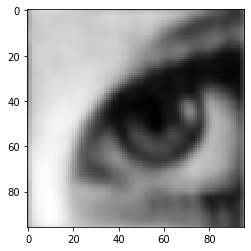

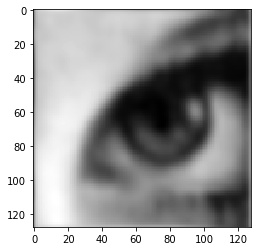

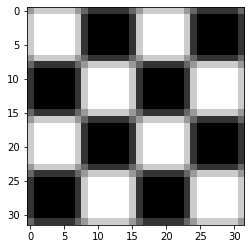

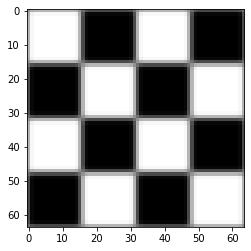

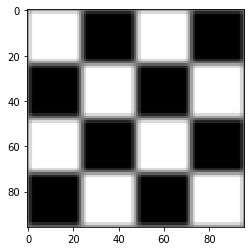

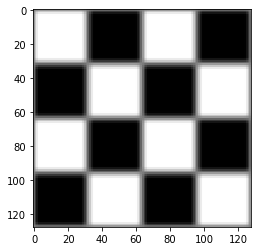

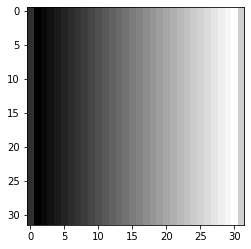

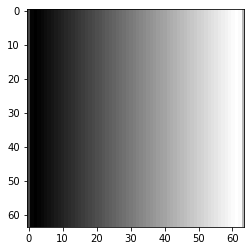

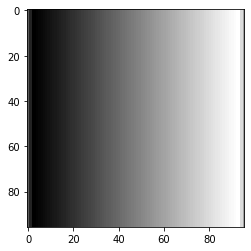

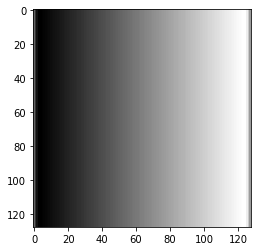

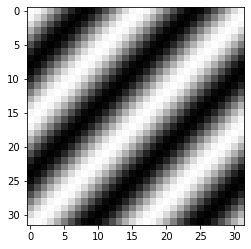

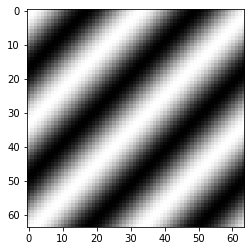

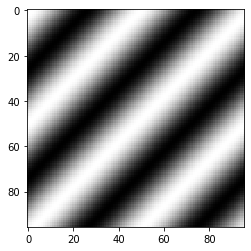

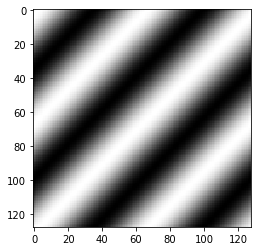

In [31]:
def oversample3(u,K):
    N = u.shape[0]
    h0 = numpy.ones((N*K,N*K))
    TFu = fft.fft2(oversample1(u,K))
    TFh = fft.fft2(approx_filter(h0,K,K))
    TFuh = TFu*TFh
    TFIuh = real(fft.ifft2(TFuh))
    return fft.fftshift(TFIuh)

for i in range(1,5):
    display_image(oversample3(u1,i))
for i in range(1,5):
    display_image(oversample3(u2,i))
for i in range(1,5):
    display_image(oversample3(u3,i))
for i in range(1,5):
    display_image(oversample3(u4,i))

In [17]:
#Exercice n°4
def enlarge(u):
    N = u.shape[0]
    w = zeros((2*N,2*N))
    a = int(N/2)
    b = int(3*N/2)
    w[a:b,a:b]=u
    return w

In [18]:
def radon(u, M) :
    N = u.shape[0]
    U = enlarge(u)
    v = zeros((N,M))
    [n,m] = meshgrid(range(N),range(M))
    for t in range(-N//2, N//2 + 1) :
        k = numpy.round((n-N/2)*cos(m*pi/M)-t*sin(m*pi/M)+N/2).astype(int64)
        l = numpy.round((n-N/2)*sin(m*pi/M)+t*cos(m*pi/M)+N/2).astype(int64)
        k[k<0] = 0
        k[k>= N] = N-1
        l[l<0] = 0
        l[l>= N] = N-1
        v[n,m] += u[k,l]
    return v

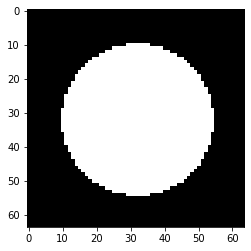

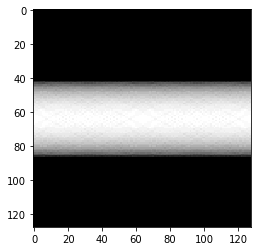

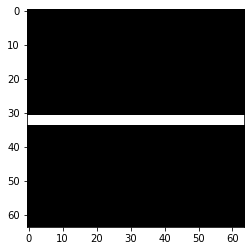

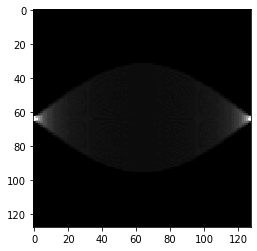

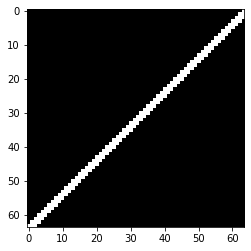

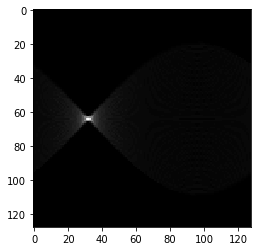

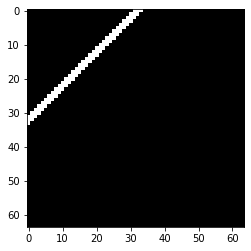

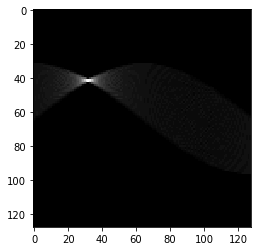

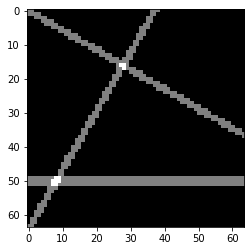

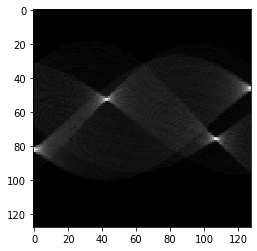

In [19]:
[m,n] = meshgrid(range(64),range(64))
v1 = zeros((64, 64))
v1[(m-32)**2 + (n-32)**2 < 500] = 1
display_image(v1)
display_image(radon(enlarge(v1),128))

v2 = zeros((64, 64))
v2[abs(n-32) < 2] = 1
display_image(v2)
display_image(radon(enlarge(v2),128))


v3 = zeros((64, 64))
v3[abs(64-m-n) < 2] = 1
display_image(v3)
display_image(radon(enlarge(v3),128))


v4 = zeros((64, 64))
v4[abs(32-m-n) < 2] = 1
display_image(v4)
display_image(radon(enlarge(v4),128))


v5 = zeros((64, 64))
v5[abs(64-m*sqrt(3)-n) < 2] += 1
v5[abs(50-n) < 2] += 1
v5[abs(m-n*sqrt(3)) < 2] += 1
display_image(v5)
display_image(radon(enlarge(v5),128))

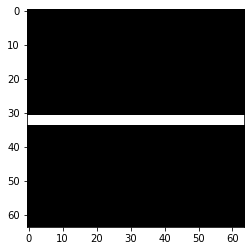

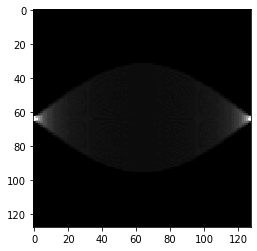

In [20]:
v2 = zeros((64, 64))
v2[abs(n-32) < 2] = 1
display_image(v2)
display_image(radon(enlarge(v2),128))

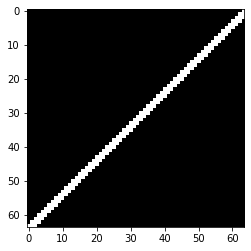

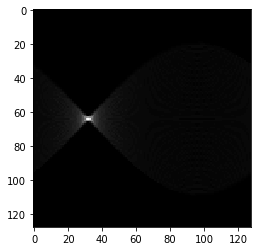

In [21]:
v3 = zeros((64, 64))
v3[abs(64-m-n) < 2] = 1
display_image(v3)
display_image(radon(enlarge(v3),128))

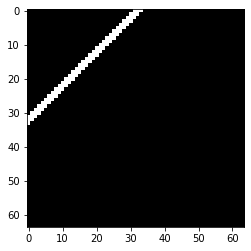

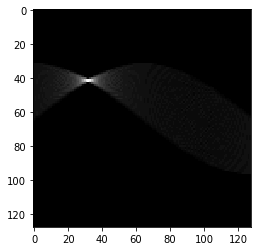

In [22]:
v4 = zeros((64, 64))
v4[abs(32-m-n) < 2] = 1
display_image(v4)
display_image(radon(enlarge(v4),128))